In [1]:
#importing the packages that we need
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0,4.0)
plt.rcParams['image.cmap'] = 'Greys'
np.set_printoptions(suppress=True)
np.set_printoptions(precision=2)

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
print(mnist.train.images.shape)
print(mnist.train.labels.shape)

(55000, 784)
(55000, 10)


In [4]:
print(mnist.test.images.shape)
print(mnist.test.labels.shape)

(10000, 784)
(10000, 10)


[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


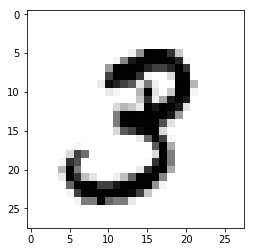

In [7]:
example_image = mnist.train.images[1]
example_image_reshaped = example_image.reshape((28,28))
example_label = mnist.train.labels[1]
print(example_label)
plt.imshow(example_image_reshaped)

In [9]:
x = tf.placeholder(tf.float32, shape = [None,784])
y_ = tf.placeholder(tf.float32, shape = [None,10])

In [13]:
def weight_variable(shape):
    return tf.Variable(tf.truncated_normal(shape,stddev=0.1))

def bias_variable(shape):
    return tf.Variable(tf.constant(0.1,shape=shape))

def conv(x, W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')

def pool(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [14]:
x_image = tf.reshape(x, [-1,28,28,1])
W_conv = weight_variable([5,5,1,32])
b_conv = bias_variable([32])
h_conv = tf.nn.relu(conv(x_image,W_conv)+b_conv)
h_pool = pool(h_conv)

# A densely connected layer (FC)
W_fc1 = weight_variable([14*14*32, 1024])
b_fc1 = bias_variable([1024])
h_pool_flat = tf.reshape(h_pool, [-1, 14*14*32])
h_fc1 = tf.nn.relu(tf.matmul(h_pool_flat, W_fc1) + b_fc1)

# Another densely connected layer (for "readout") (FC)
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y = tf.matmul(h_fc1, W_fc2) + b_fc2

In [15]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))

In [16]:
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [17]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [18]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [19]:
for i in range(20000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(session=sess, feed_dict={
            x:batch[0], y_: batch[1]})
        print("step %d, training accuracy %g"%(i, train_accuracy))
    train_step.run(session=sess, feed_dict={x: batch[0], y_: batch[1]})

step 0, training accuracy 0.14
step 100, training accuracy 0.82
step 200, training accuracy 0.92
step 300, training accuracy 0.92
step 400, training accuracy 0.98
step 500, training accuracy 0.88
step 600, training accuracy 1
step 700, training accuracy 0.94
step 800, training accuracy 0.88
step 900, training accuracy 1
step 1000, training accuracy 0.98
step 1100, training accuracy 0.96
step 1200, training accuracy 0.96
step 1300, training accuracy 0.94
step 1400, training accuracy 0.98
step 1500, training accuracy 0.96
step 1600, training accuracy 0.96
step 1700, training accuracy 0.98
step 1800, training accuracy 0.96
step 1900, training accuracy 0.98
step 2000, training accuracy 1
step 2100, training accuracy 1
step 2200, training accuracy 0.96
step 2300, training accuracy 0.96
step 2400, training accuracy 0.94
step 2500, training accuracy 1
step 2600, training accuracy 0.98
step 2700, training accuracy 0.92
step 2800, training accuracy 0.9
step 2900, training accuracy 0.96
step 300

In [20]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9886
